## Exercise 5.1
the distribution of heights is roughly normal with parameters mean= 178 cm and std= 7.7 cm for men, and mean= 163 cm and std =7.3 cm for women. To Join blue man group. you have to be male and between 5′10″ and 6′1″ tall. What percentage of the US male population is in this range

In [1]:
import nsfg
import numpy as np
import thinkstats2
import thinkplot
import scipy.stats

#per statement, mu=178cm and sigma=7.7 and it is a normal distribution
mu =178
sigma =7.7
distro= scipy.stats.norm(loc=178, scale=7.7)

In [2]:
# convert ft/inch to cm, 5'10" is 177.8 cm, 6'1" is 185.4 cm
lowend = distro.cdf(177.8)
highend = distro.cdf(185.4)
print ('the Precentage of US male popultaion within range is', round(((highend-lowend)*100),2), '%')

the Precentage of US male popultaion within range is 34.21 %


## Exercise 5.2
let’s see how different the world would be if the distribution of human height were Pareto. With the parameters Xmin = 1m and alpha=1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.

Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?

In [3]:
xmin =1
alpha =1.7
distro = scipy.stats.pareto(b=1.7, scale=1)

In [4]:
print ('the mean height in pareto distro is', round(distro.mean(),2), 'meter')
#the mean is 2.43
print('the precent of human shorter than distro mean is',round((distro.cdf(2.43)),3)*100, 'percentage')

the mean height in pareto distro is 2.43 meter
the precent of human shorter than distro mean is 77.9 percentage


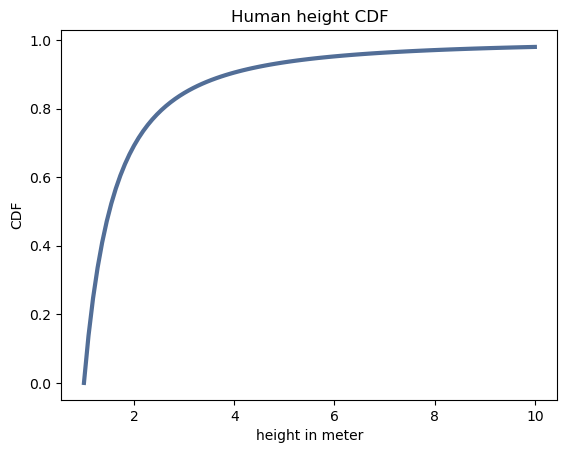

In [12]:
#plot the cdf
xs, ps = thinkstats2.RenderParetoCdf(xmin,alpha,0,10.0,n=100)
thinkplot.Plot(xs,ps)
thinkplot.Config(title='Human height CDF',xlabel='height in meter',ylabel='CDF',loc='lower right')

### How many people taller than 1 KM (1000 meter) out of 7 billion people

In [5]:
print('Count of people taller than 1KM is',round((1-distro.cdf(1000))*7e9))

Count of people taller than 1KM is 55603


### How tall is the tallest person
expect only one person is the tallest

In [6]:
print('Tallest height is', round(distro.ppf(1-1/7e9),2), 'meter')

Tallest height is 618349.61 meter


## Exercise 6.1
The distribution of income is famously skewed to the right. In this exercise, we’ll measure how strong that skew is, The InterpolateSample generates a pseudo-sample, Compute the median, mean, skewness and Pearson’s skewness of the resulting sample. 

with income upper limit as $10 million


C:\Users\Daisy\AppData\Local\Temp\ipykernel_3452\2251113045.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.log_lower[0] = 3.0
C:\Users\Daisy\AppData\Local\Temp\ipykernel_3452\2251113045.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.log_upper[41] = log_upper


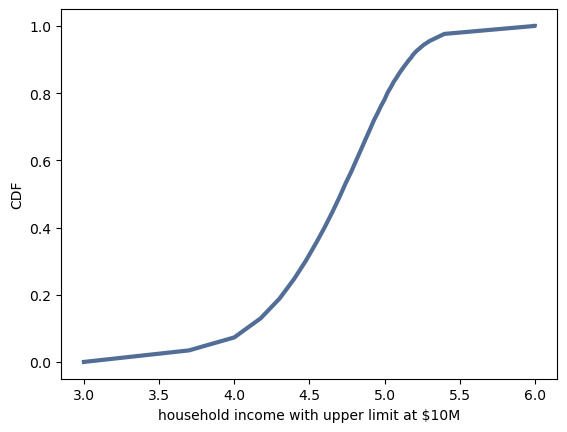

mean 74278.7075311872
std 93946.92996347835
median 51226.45447894046
skewness 4.949920244429583
pearson skewness 0.7361258019141782
cdf[mean_1M] 70.0 %

 with income upper limit as 100 million


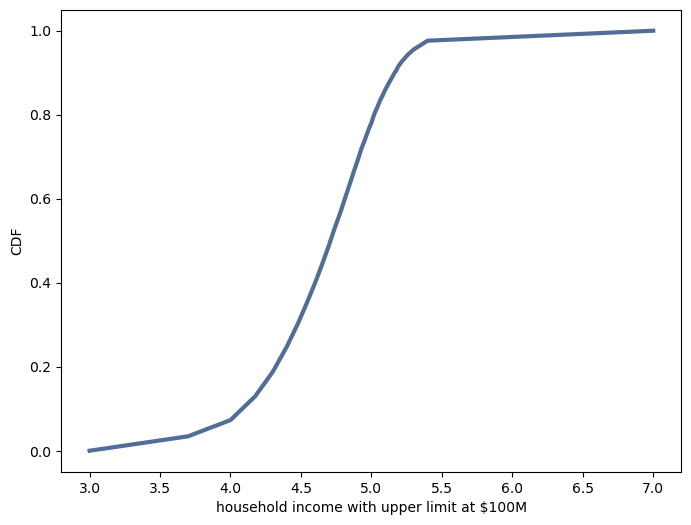

mean 124267.39722164697
std 559608.5013743473
median 51226.45447894046
skewness 11.603690267537793
pearson skewness 0.39156450927742087
cdf[mean_100M] 90.0 %

 with income upper limit as 1 million


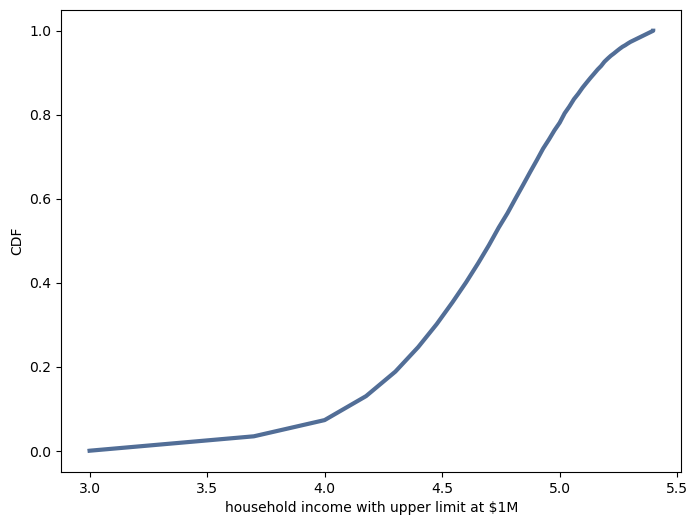

mean 65308.99990535354
std 52150.97956569737
median 51226.45447894046
skewness 1.1795507798229026
pearson skewness 0.8101024492937389
cdf[mean_100K] 60.0 %


<Figure size 800x600 with 0 Axes>

In [22]:
# the hinc.py read & clean the data, the hinc2.py create the sample the data. hinc2 assume upper limit is 1 million.
from __future__ import print_function

import density
import hinc

def InterpolateSample(df, log_upper=6.0):
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.log_lower[0] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.log_upper[41] = log_upper

    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample

def main():
    df = hinc.ReadData()
    print('with income upper limit as $10 million')
    log_sample1 = InterpolateSample(df, log_upper=6.0)

    log_cdf = thinkstats2.Cdf(log_sample1)
    thinkplot.Cdf(log_cdf)
    thinkplot.Show(xlabel='household income with upper limit at $10M',
                   ylabel='CDF')
    
    sample1 = np.power(10, log_sample1)
    mean1, median1 = density.Summarize(sample1)

    cdf = thinkstats2.Cdf(sample1)
    print('cdf[mean_1M]', round(cdf[mean1],1)*100, '%')

    pdf = thinkstats2.EstimatedPdf(sample1)
    
    #now calculate with upper limite set as $100 million
    print('\n','with income upper limit as 100 million')
    log_sample2 = InterpolateSample(df, log_upper=7.0)
    log_cdf = thinkstats2.Cdf(log_sample2)
    thinkplot.Cdf(log_cdf)
    thinkplot.Show(xlabel='household income with upper limit at $100M',
                   ylabel='CDF')
    
    sample2 = np.power(10, log_sample2)
    mean2, median2 = density.Summarize(sample2)
    cdf = thinkstats2.Cdf(sample2)
    print('cdf[mean_100M]', round(cdf[mean2],1)*100,'%')
    
     #now calculate with upper limite set as $1 million, log10 e5
    print('\n','with income upper limit as 1 million')
    log_sample3 = InterpolateSample(df, log_upper=5.0)
    log_cdf = thinkstats2.Cdf(log_sample3)
    thinkplot.Cdf(log_cdf)
    thinkplot.Show(xlabel='household income with upper limit at $1M',
                   ylabel='CDF')
    
    sample3 = np.power(10, log_sample3)
    mean3, median3 = density.Summarize(sample3)
    cdf = thinkstats2.Cdf(sample3)
    print('cdf[mean_100K]', round(cdf[mean3],1)*100,'%')

if __name__ == "__main__":
    main()


### conclusion:
it shows when upper limit set at 1 million, about 60% people are withincome below mean, when upper limit set at higher number, the below mean percentage increased, which is reasonable since high income pushed the mean higher. the skewness increase faster after 1M, which mean higher upper limit skewed the data more. At the same time, the pearson skewness change much slower and in revserse trend. so it is hard to use to expalin the income trend. 

Also from cdf chart, most people income is below $320K (log10=5.5).